In [8]:
import pandas  as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.compose import ColumnTransformer

In [10]:
df= pd.read_csv(r'C:\Users\ASUS\OneDrive\Desktop\everything\eda + dap\synthetic_data (13).csv')

In [12]:
df.head()

,Age,Salary,City,Experience,Promotion
0,56.0,55920.0,Pune,7.0,0.0
1,46.0,87121.0,Chennai,13.0,NaN
2,32.0,89479.0,Chennai,NaN,1.0
3,25.0,39457.0,Mumbai,13.0,1.0
4,38.0,NaN,Pune,4.0,0.0


In [14]:
df.dtypes

Age           float64
Salary        float64
City           object
Experience    float64
Promotion     float64
dtype: object

In [17]:
df.isnull().sum()

Age           0
Salary        0
City          0
Experience    0
Promotion     0
dtype: int64

In [16]:
df.dropna(inplace=True)

In [28]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [29]:
print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: Index(['Age', 'Salary', 'Experience', 'Promotion'], dtype='object')
Categorical columns: Index(['City'], dtype='object')


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

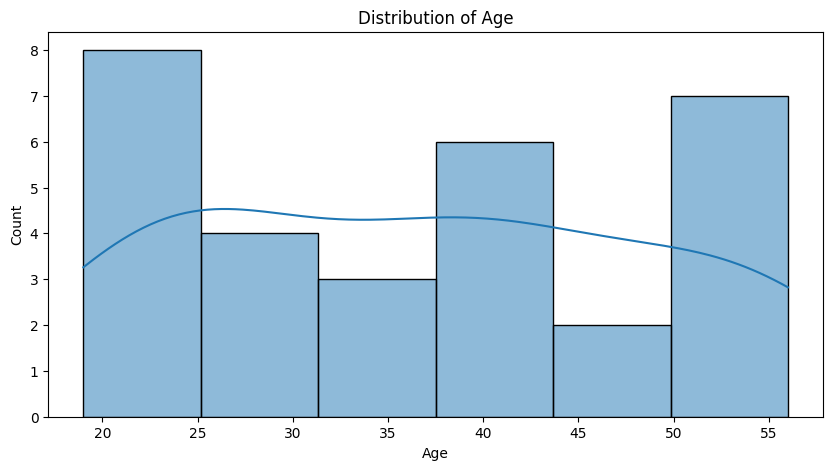

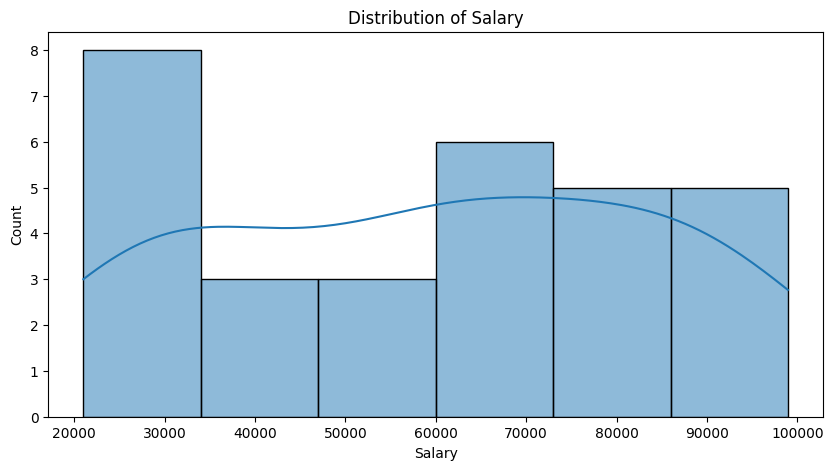

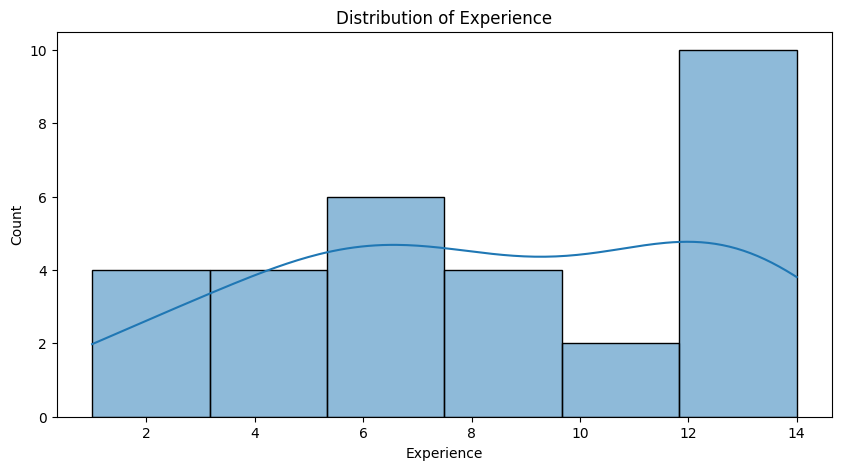

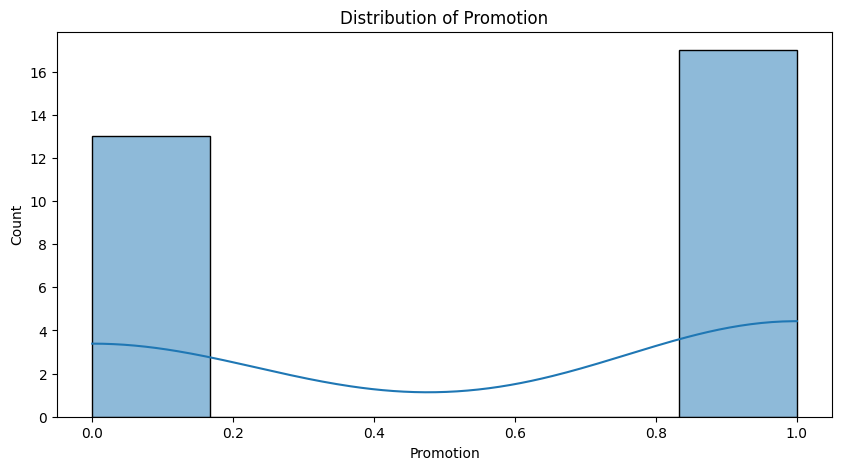

In [30]:
for col in numerical_columns:
    plt.figure(figsize=(10,5))
    sns.histplot(df[col],kde=True)
    plt.title(f'Distribution of {col}') 
    plt.show()
    

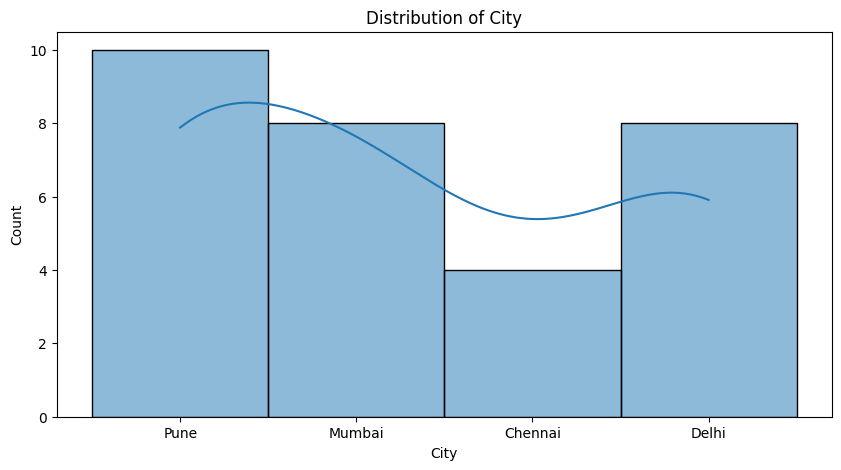

In [32]:
for col in categorical_columns:
    plt.figure(figsize=(10,5))
    sns.histplot(df[col],kde=True)
    plt.title(f'Distribution of {col}') 
    plt.show()
    

In [35]:
X = df[list(categorical_columns) + list(numerical_columns)]
y = df['Salary']

In [ ]:
# encoded_df = pd.get_dummies(df, columns=["City"], prefix="City", drop_first=True)


In [53]:
label_encoders = LabelEncoder()
df[categorical_columns] = df[categorical_columns].apply(label_encoders.fit_transform)


In [54]:
df.head()

,Age,Salary,City,Experience,Promotion
0,56.0,55920.0,3,7.0,0.0
3,25.0,39457.0,2,13.0,1.0
5,56.0,97189.0,0,13.0,0.0
6,36.0,98953.0,1,7.0,1.0
8,28.0,60757.0,2,3.0,1.0


In [56]:
from sklearn.compose import ColumnTransformer


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:
model = LinearRegression()


In [61]:
from sklearn.metrics import mean_squared_error, r2_score


In [62]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 9.705585853955524e-23
R² Score: 1.0
